In [1]:
# THURSDAY
from datetime import datetime, timedelta
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from   pandas.plotting import register_matplotlib_converters
from   pprint import pprint
import yfinance as yf

warnings.filterwarnings('ignore')
register_matplotlib_converters()
%matplotlib inline

In [2]:
TODAY = datetime.now()
START = str((TODAY - timedelta(days=20*365)).date())
START

'2001-08-03'

In [3]:
TICKER = '^W5000'
df = yf.download(TICKER, start=START)
df = df[['Open', 'Close', 'Adj Close']]
df.rename(columns={'Adj Close': 'Value'}, inplace=True)
df['Date'] = df.index
df.index = range(df.shape[0])
df.tail()

[*********************100%***********************]  1 of 1 completed


,Open,Close,Value,Date
5015,45491.539062,45940.781250,45940.781250,2021-07-23
5016,45940.781250,46039.640625,46039.640625,2021-07-26
5017,46039.640625,45744.250000,45744.250000,2021-07-27
5018,45744.250000,45830.738281,45830.738281,2021-07-28
5019,45830.699219,46002.996094,46002.996094,2021-07-29


In [4]:
n = df.index.max()
if df.loc[n, 'Open'] == 0:
    !say "Using yesterday's open data"
    df.loc[n, 'Open'] = df.loc[n - 1, 'Open']

In [5]:
df['IntradayChange'] = df['Close'] / df['Open']
df.tail()

,Open,Close,Value,Date,IntradayChange
5015,45491.539062,45940.781250,45940.781250,2021-07-23,1.009875
5016,45940.781250,46039.640625,46039.640625,2021-07-26,1.002152
5017,46039.640625,45744.250000,45744.250000,2021-07-27,0.993584
5018,45744.250000,45830.738281,45830.738281,2021-07-28,1.001891
5019,45830.699219,46002.996094,46002.996094,2021-07-29,1.003759


In [6]:
df['DayToDayChange'] = np.nan
df['OvernightChange'] = np.nan
for day in range(1, df.shape[0]):
    df.loc[day, 'DayToDayChange'] = (df.loc[day, 'Value'] 
                                     / df.loc[day - 1, 'Value'])
    df.loc[day, 'OvernightChange'] = (df.loc[day, 'Open'] 
                                      / df.loc[day - 1, 'Close'])
df.tail()        

,Open,Close,Value,Date,IntradayChange,DayToDayChange,OvernightChange
5015,45491.539062,45940.781250,45940.781250,2021-07-23,1.009875,1.009875,1.000000
5016,45940.781250,46039.640625,46039.640625,2021-07-26,1.002152,1.002152,1.000000
5017,46039.640625,45744.250000,45744.250000,2021-07-27,0.993584,0.993584,1.000000
5018,45744.250000,45830.738281,45830.738281,2021-07-28,1.001891,1.001891,1.000000
5019,45830.699219,46002.996094,46002.996094,2021-07-29,1.003759,1.003759,0.999999


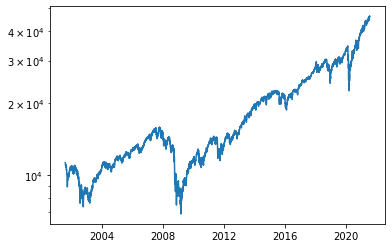

In [7]:
plt.plot(df.Date, df.Value);
plt.yscale('log');

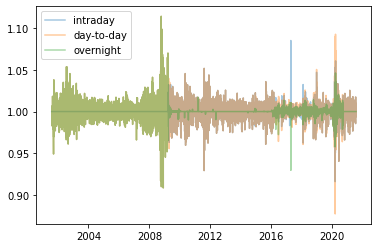

In [8]:
plt.plot(df.Date, df.IntradayChange, alpha=0.4, label='intraday')
plt.plot(df.Date, df.DayToDayChange, alpha=0.4, label='day-to-day')
plt.plot(df.Date, df.OvernightChange, alpha=0.4, label='overnight')
plt.legend();

In [9]:
df = df.loc[3014:, :]
df.index = range(df.shape[0])

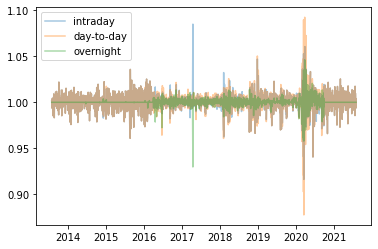

In [10]:
plt.plot(df.Date, df.IntradayChange, alpha=0.4, label='intraday')
plt.plot(df.Date, df.DayToDayChange, alpha=0.4, label='day-to-day')
plt.plot(df.Date, df.OvernightChange, alpha=0.4, label='overnight')
plt.legend();

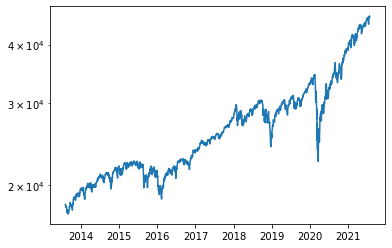

In [11]:
plt.plot(df.Date, df.Value);
plt.yscale('log');

In [12]:
df.head()

,Open,Close,Value,Date,IntradayChange,DayToDayChange,OvernightChange
0,18128.560547,18154.439453,18154.439453,2013-08-02,1.001428,1.001428,1.0
1,18154.439453,18141.060547,18141.060547,2013-08-05,0.999263,0.999263,1.0
2,18141.060547,18023.599609,18023.599609,2013-08-06,0.993525,0.993525,1.0
3,18023.599609,17940.080078,17940.080078,2013-08-07,0.995366,0.995366,1.0
4,17940.080078,18015.220703,18015.220703,2013-08-08,1.004188,1.004188,1.0


In [13]:
START_DATE = df.loc[0,  'Date']
START_DATE

Timestamp('2013-08-02 00:00:00')

In [14]:
df.tail()

,Open,Close,Value,Date,IntradayChange,DayToDayChange,OvernightChange
2001,45491.539062,45940.781250,45940.781250,2021-07-23,1.009875,1.009875,1.000000
2002,45940.781250,46039.640625,46039.640625,2021-07-26,1.002152,1.002152,1.000000
2003,46039.640625,45744.250000,45744.250000,2021-07-27,0.993584,0.993584,1.000000
2004,45744.250000,45830.738281,45830.738281,2021-07-28,1.001891,1.001891,1.000000
2005,45830.699219,46002.996094,46002.996094,2021-07-29,1.003759,1.003759,0.999999


In [15]:
df.Value = np.log(df.Value)
df.rename(columns={'Value': 'LogValue'}, inplace=True)
df.tail()

,Open,Close,LogValue,Date,IntradayChange,DayToDayChange,OvernightChange
2001,45491.539062,45940.781250,10.735108,2021-07-23,1.009875,1.009875,1.000000
2002,45940.781250,46039.640625,10.737258,2021-07-26,1.002152,1.002152,1.000000
2003,46039.640625,45744.250000,10.730821,2021-07-27,0.993584,0.993584,1.000000
2004,45744.250000,45830.738281,10.732710,2021-07-28,1.001891,1.001891,1.000000
2005,45830.699219,46002.996094,10.736462,2021-07-29,1.003759,1.003759,0.999999


In [16]:
def moving_dev_signals(x, params):
    '''
    @params
    x: list: time series of quantiles (relative to an arbitrary window)
    params: dictionary 
      {'qs': [<np.array of quantiles>], 
       'amounts': [<np.array of amounts>]}
    qs: lists<float>: quantiles for which, moving upward/downward 
        across signals an action. A + value indicate an upward movement; -
        for downward movement.
    amounts: lists<float>: amount (%) to put in (+) or take out (-)
        associated with each signal in <qs>
    @return: array of signals (usually just one, but multiple events may
        occur on a single day)
    '''
    qs = params['qs']
    amounts = params['amounts']
    assert len(qs) == len(amounts), 'qs and amounts of different lengths'
    up_qs = qs[qs >= 0]
    down_qs = -qs[qs < 0]
    up_amounts = amounts[qs >= 0]
    down_amounts = amounts[qs < 0]
    x = x.tolist()
    n = len(x)
    up_q_vals = np.quantile(x, up_qs)
    down_q_vals = np.quantile(x, down_qs)
    signals = []
    for q, action in zip(up_q_vals, up_amounts):
        if x[n - 1] < q and x[n] > q:  ###
            signals.append(action)
    for q, action in zip(down_q_vals, down_amounts):
        if x[n - 1] > q and x[n] < q:  ###
            signals.append(action)
    return signals if signals else [0]

In [17]:
def get_devs_relative_to_trend(df, ma_window):
    ma = np.log(df.loc[:, 'LogValue']).rolling(window=ma_window).mean()
    df['difference'] = np.log(df['LogValue']) - ma
    n = df.shape[0]
    qs = list(np.linspace(1, 0, n))
    x = [0] * n
    for i in df.sort_values('difference').index:
        x[i] = qs.pop()
    return x

In [18]:
def generate_actions(df, window, params):
    '''
    Given a <window> to calculate the MA over, and <params> for 
    <moving_dev_signals()>, return <sp> with an <Actions> field appended, 
    each value for which should be a list of actions (%s in out) each day,
    based on the signal(s) that occurred each day.
    '''
    qs = np.array(params['qs'])
    amounts = np.array(params['amounts'])
    assert len(qs) == len(amounts), 'qs and amounts of different lengths'
    df['q'] = get_devs_relative_to_trend(df, window)
    up_qs = qs[qs >= 0]
    down_qs = -qs[qs < 0]
    up_amounts = amounts[qs >= 0]
    down_amounts = amounts[qs < 0]
    x = df.q
    n = len(x)
    df.index = range(n)
    df['Actions'] = pd.Series([[0] for i in range(n)])
    for i in range(window, n):
        signals = []
        for q, action in zip(up_qs, up_amounts):
            if x[i - 1] < q and x[i] >= q: ###
                signals.append(action)
        for q, action in zip(down_qs, down_amounts):
            if x[i - 1] >= q and x[i] < q: ###
                signals.append(action)
        signals = signals or [0]
        try:
            df.at[i, 'Actions'] = signals
        except BaseException as e:
            print(e)
            print(df.at[i, 'Actions'], '<-', signals)
            return(sp)
    return df

In [19]:
test = generate_actions(
    df, 20, {'qs': [-0.4, 0.6], 'amounts': [1, -0.5]})
test.tail()

,Open,Close,LogValue,Date,IntradayChange,DayToDayChange,OvernightChange,difference,q,Actions
2001,45491.539062,45940.781250,10.735108,2021-07-23,1.009875,1.009875,1.000000,0.001304,0.637406,[-0.5]
2002,45940.781250,46039.640625,10.737258,2021-07-26,1.002152,1.002152,1.000000,0.001402,0.663840,[0]
2003,46039.640625,45744.250000,10.730821,2021-07-27,0.993584,0.993584,1.000000,0.000737,0.483292,[0]
2004,45744.250000,45830.738281,10.732710,2021-07-28,1.001891,1.001891,1.000000,0.000838,0.509726,[0]
2005,45830.699219,46002.996094,10.736462,2021-07-29,1.003759,1.003759,0.999999,0.001096,0.580050,[0]


In [20]:
init_amount = df.loc[0, 'Close']
init_amount

18154.439453125

In [21]:
df['Reserve'] = np.nan
df['Invested'] = np.nan
df.loc[0, 'Reserve'] = 0.
df.loc[0, 'Invested'] = init_amount
df.loc[:, 'Total'] = df.Reserve + df.Invested
df.head()

,Open,Close,LogValue,Date,IntradayChange,DayToDayChange,OvernightChange,difference,q,Actions,Reserve,Invested,Total
0,18128.560547,18154.439453,9.806670,2013-08-02,1.001428,1.001428,1.0,NaN,0.991022,[0],0.0,18154.439453,18154.439453
1,18154.439453,18141.060547,9.805933,2013-08-05,0.999263,0.999263,1.0,NaN,0.991521,[0],NaN,NaN,NaN
2,18141.060547,18023.599609,9.799437,2013-08-06,0.993525,0.993525,1.0,NaN,0.992020,[0],NaN,NaN,NaN
3,18023.599609,17940.080078,9.794793,2013-08-07,0.995366,0.995366,1.0,NaN,0.992519,[0],NaN,NaN,NaN
4,17940.080078,18015.220703,9.798972,2013-08-08,1.004188,1.004188,1.0,NaN,0.993017,[0],NaN,NaN,NaN


In [22]:
def get_next_days_values(row, overnight_change):
    reserve = row['Reserve']
    invested = row['Invested']
    #overnight_change = row['OvernightChange']
    invested *= overnight_change # value at next day open
    money_per_action = 0
    for action in row['Actions']:
        if action > 0: # Buy
            money_per_action = reserve * action
        if action < 0: # Sell
            money_per_action = invested * action    
        reserve -= money_per_action
        invested += money_per_action # value at morning after transactions
    return reserve, invested # value at start of day

In [23]:
def predict_performance(df):
    for day in range(1, df.shape[0]):
        prev_day = df.loc[day - 1, :]
        overnight_change = df.loc[day, 'OvernightChange']
        df.loc[day, ['Reserve', 'Invested']] = get_next_days_values(
            prev_day, overnight_change)
        df.loc[day, 'Invested'] *= df.loc[day, 'IntradayChange']
        df.Total = df.Reserve + df.Invested
    return df

In [24]:
def print_params(params, window):
    print('window:', window)
    print('params:')
    pprint(params)

In [25]:
def trunc_normal(mean, sd, minval, maxval, exclude0=False):
    val = np.random.normal(mean, scale=sd)
    val = max(min(val, maxval), minval)
    if exclude0:
        if -0.01 < val <= 0:
            val = -0.01
        elif 0 <= val < 0.01:
            val = 0.01
    return val

In [26]:
def init_values(
        sd, init_window, init_params, min_window=40, mindiff=0.05):
    window = int(round(
            trunc_normal(init_window, 400*sd, min_window, 1000)))
    params = {'qs': [trunc_normal(mean, sd, -0.99, 0.99, exclude0=True) 
                     for mean in init_params['qs']],
              'amounts': [trunc_normal(mean, 2*sd, -0.99, 0.99)
                          for mean in init_params['amounts']]}
    qs = np.array(sorted(params['qs']))
    diffs = qs[1:] - qs[:-1]
    if (diffs[diffs < mindiff]).any():
        init_values(sd, init_window, init_params, min_window, mindiff)
    return window, params

`specified` indicates which params can change, and should be formatted as:
```
{'windows': True,
 'qs': [1, 3],
 'amounts': [0, 1]}
```

In [27]:
def init_specific_values(
        sd, init_window, init_params, specified, min_window=40, 
        mindiff=0.05):
    if specified['window']:
        window = int(round(
            trunc_normal(init_window, 400*sd, min_window, 1000)))
    else:
        window = init_window
    for q in specified['qs']:
        init_params['qs'][q] = trunc_normal(
            init_params['qs'][q], sd, -0.99, 0.99, exclude0=True)
    for amt in specified['amounts']:
        init_params['amounts'][amt] = trunc_normal(
            init_params['amounts'][amt], sd, -0.99, 0.99, exclude0=True)
    qs = np.array(sorted(specified['qs']))
    diffs = qs[1:] - qs[:-1]
    if (diffs[diffs < mindiff]).any():
        init_specific_values(
            sd, init_window, init_params, min_window, mindiff)  
    return window, init_params

init_specific_values(
    0.01, 
    199, 
    init_params={'qs': [0.2, 0.4, 0.6], 'amounts': [-.5, 0.5, 0.1]}, 
    specified={'window': True, 'qs': [0], 'amounts': [0, 2]})

(196,
 {'qs': [0.18263113974987505, 0.4, 0.6],
  'amounts': [-0.4972835596263335, 0.5, 0.11061645337915958]})

In [28]:
def run_sim(
        df, sd, best_window, best_params, best_data, best_yet, 
        specified=None):
    plt.figure(figsize=[10, 8])
    plt.plot(df.Date, df.Close, 'k-', linewidth=3)
    for i in range(ITERS):
        if i == 0:
            window = best_window
            params = best_params
        else:
            if specified is not None:
                window, params = init_specific_values(
                    sd, best_window, best_params, specified)
            else:
                window, params = init_values(sd, best_window, best_params)
        df = generate_actions(df, window, params=params)
        df = predict_performance(df)
        plt.plot(df.Date, df.Total, alpha=0.2);
        final_value = df.Total.tolist()[-1]
        print(f'{i + 1:2d}: Final value: ${final_value:8.2f} '
              f'(window = {window}; sd = {sd:.3f})', end='\r')
        if final_value > best_yet:
            print('\nNew best model!')
            print_params(params, window)
            best_yet = final_value
            best_params = params
            best_window = window
            sd *= 1.5
            sd = min(sd, 1.024)
            best_data = df.copy()
        else:
            sd *= 0.99
            sd = max(sd, 0.001)
            if best_data is None:
                best_data = df.copy()
    plt.yscale('log');    
    return best_data

In [29]:
def plot_results(best_data, start_date=None):
    VIZ_START_DATE = pd.to_datetime('1960-01-01')
    start_date = (pd.to_datetime(start_date) if start_date is not None 
                  else VIZ_START_DATE)
    best_data['fraction_in'] = (best_data.Invested 
                                / (best_data.Invested + best_data.Reserve))
    sub = best_data.loc[best_data.Date >= start_date, :]
    plt.figure(figsize=[10, 4])
    plt.plot(sub.Date, sub.Close, 'k-')
    plt.plot(sub.Date, sub.Total, 'b-')
    plt.yscale('log')
    plt.figure(figsize=[10, 8])
    plt.subplot(221)
    plt.plot(sub.Date, sub.Close, 'k-')
    plt.yscale('log')
    plt.subplot(222)
    plt.plot(sub.Date, sub.Total, 'b-')
    plt.yscale('log')
    plt.subplot(223)
    plt.plot(sub.Date, sub.fraction_in);
    plt.subplot(224)
    plt.plot(sub.Date, sub.fraction_in);
    plt.yscale('log')
    percent_in_now = best_data.fraction_in.tolist()[-1]
    print('% in now:', percent_in_now)
    actions_taken = sub.Actions\
        .apply(lambda x: sum(x) != 0 if isinstance(x, list) else False)\
        .sum()
    print('Actions taken:', actions_taken)

In [30]:
RUN = 1

# Repeat Search from Here

# 4-Deviations per direction (private portfolio)

```
67: Final value: $54165.12 (window = 116; sd = 0.034)
New best model!
window: 116
params:
{'amounts': [0.99, 0.2411780086973655, -0.99, -0.44801435780785714],
 'qs': [-0.37235822899811793,
        0.8092841935935033,
        -0.7730497793154596,
        -0.9324976734042728]}
        
        
        
```

In [56]:
DEFAULT4PARAMS = {'qs':      [0.4, 0.6, -0.4, -0.6],
                  'amounts': [  0,   0,    0,    0]}
DEFAULT_WINDOW = 60

In [57]:
ITERS = 1 if RUN == 1 else 75
BEST4EVER = 54165 * 0.5
BEST4PARAMS = {'amounts': [0.99, 0.2411780086973655, -0.99, -0.44801435780785714],
 'qs': [-0.37235822899811793,
        0.8092841935935033,
        -0.7730497793154596,
        -0.9324976734042728]}
BEST4WINDOW = 116

#BEST4PARAMS = DEFAULT4PARAMS ###
#BEST4WINDOW = DEFAULT_WINDOW ###

In [58]:
best4yet = BEST4EVER
best4params = BEST4PARAMS
best4window = BEST4WINDOW
if RUN == 1:
    best4data = None 
    best3data = None
    best2data = None

In [59]:
sd = 0.043
specified = None
#specified = {'window': True, 'amounts': [], 'qs': []} # ~3
#specified = {'window': False, 'amounts': [], 'qs': [2]} # ~3

 1: Final value: $53228.81 (window = 121; sd = 0.043)
New best model!
window: 121
params:
{'amounts': [0.977771825030893,
             0.29880920412813483,
             -0.9244050082163024,
             -0.4433054688620132],
 'qs': [-0.36033825193259184,
        0.7627771254921639,
        -0.7748985472056179,
        -0.9245750939798715]}
67: Final value: $54165.12 (window = 116; sd = 0.034)
New best model!
window: 116
params:
{'amounts': [0.99, 0.2411780086973655, -0.99, -0.44801435780785714],
 'qs': [-0.37235822899811793,
        0.8092841935935033,
        -0.7730497793154596,
        -0.9324976734042728]}


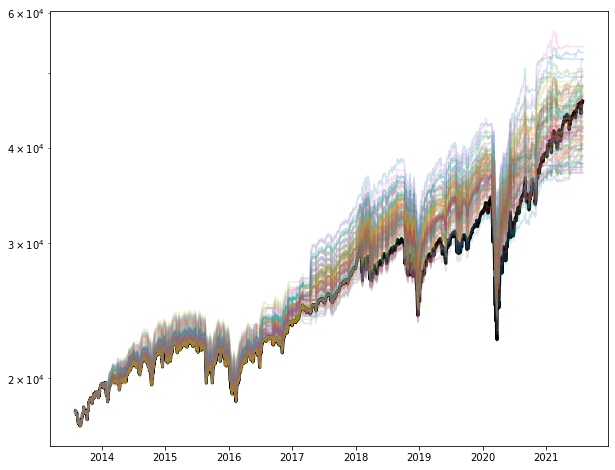

In [60]:
best4data = run_sim(df, 
                    sd, 
                    best4window, 
                    best4params, 
                    best4data, 
                    best4yet, 
                    specified=specified)

% in now: 4.521272038792395e-09
Actions taken: 109


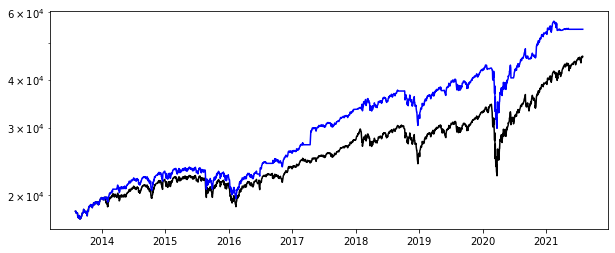

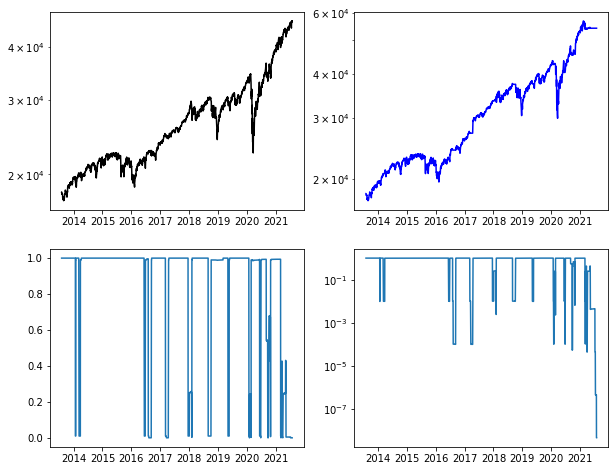

In [61]:
plot_results(best4data)

% in now: 4.521272038792395e-09
Actions taken: 34


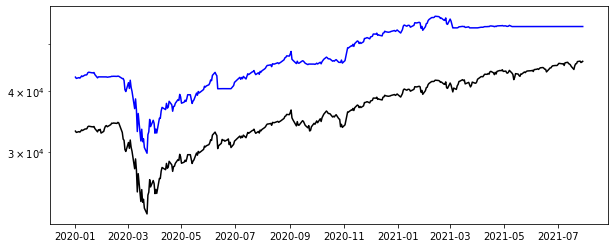

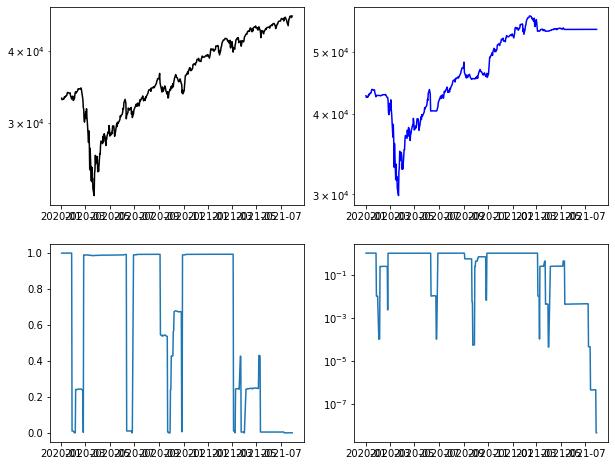

In [62]:
plot_results(best4data, '2020-01-01')

# 3-Deviations  (401(k))

```
20: Final value: $57006.96 (window = 807; sd = 0.189))
New best model!
window: 807
params:
{'amounts': [0.99, -0.7734361916415635, -0.99],
 'qs': [-0.16267282326484045, 0.6119499805926298, -0.44686606293299336]}

 
 
 
```

In [63]:
DEFAULT3PARAMS = {'qs':      [-0.4, 0.5, 0.6],
                  'amounts': [   0,   0,   0]}

In [64]:
BEST3YET = 57007 * 0.5
BEST3PARAMS = {'amounts': [0.99, -0.7734361916415635, -0.99],
 'qs': [-0.16267282326484045, 0.6119499805926298, -0.44686606293299336]}
BEST3WINDOW = 807
#BEST3PARAMS = DEFAULT3PARAMS ###
#BEST3WINDOW = DEFAULT_WINDOW ###

In [65]:
best3yet = BEST3YET
best3params = BEST3PARAMS
best3window = BEST3WINDOW

In [66]:
sd = 0.165
specified = None
#specified = {'window': True, 'amounts': [], 'qs': []} # ~2
#specified = {'window': False, 'amounts': [], 'qs': [2]} # ~2

 1: Final value: $53913.01 (window = 881; sd = 0.151)
New best model!
window: 881
params:
{'amounts': [0.8990347499243834, -0.7187118111594712, -0.99],
 'qs': [-0.3212009004187576, 0.6107946896078604, -0.41907180702106406]}
20: Final value: $57006.96 (window = 807; sd = 0.189))
New best model!
window: 807
params:
{'amounts': [0.99, -0.7734361916415635, -0.99],
 'qs': [-0.16267282326484045, 0.6119499805926298, -0.44686606293299336]}


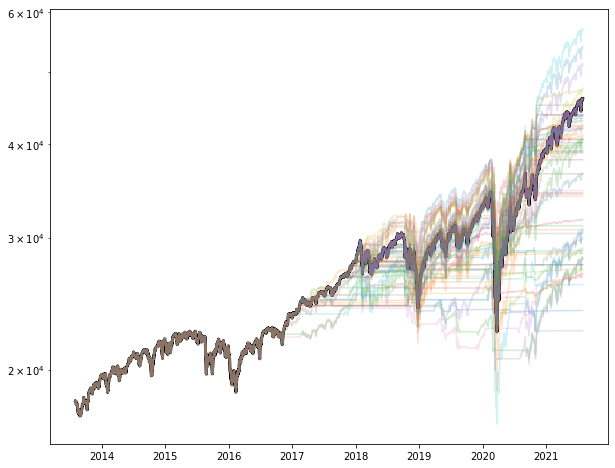

In [67]:
best3data = run_sim(df, 
                    sd, 
                    best3window, 
                    best3params, 
                    best3data, 
                    best3yet, 
                    specified=specified)

% in now: 0.9927178093180955
Actions taken: 42


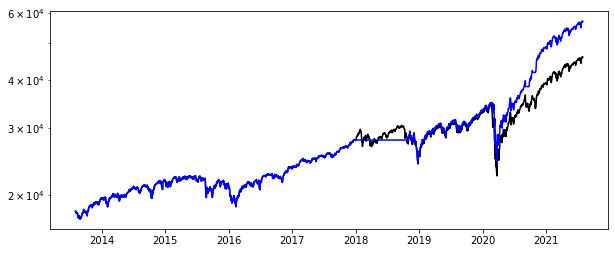

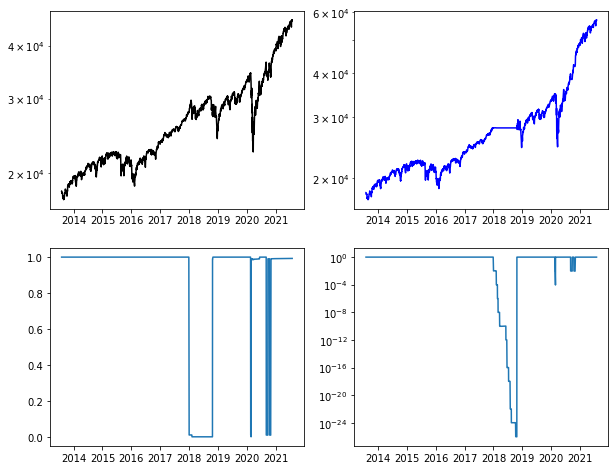

In [68]:
plot_results(best3data)

% in now: 0.9927178093180955
Actions taken: 11


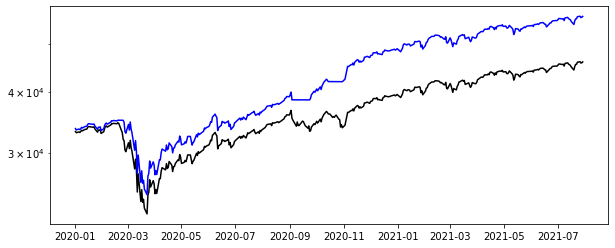

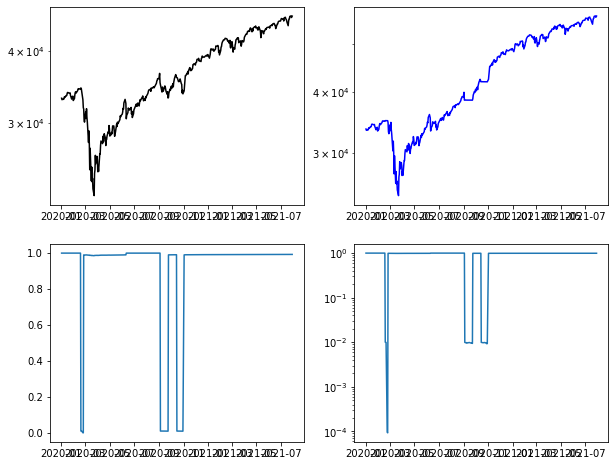

In [69]:
plot_results(best3data, '2020-01-01')

# 2-Deviations

```
11: Final value: $57930.07 (window = 73; sd = 0.037)
New best model!
window: 73
params:
{'amounts': [-0.8275387133077545, 0.9367675550051928],
 'qs': [-0.5354741267533019, -0.2331738182487476]}
 
 
 
 ```        

In [70]:
DEFAULT2PARAMS = {'qs':      [0.5, -0.5],
                  'amounts': [  0,    0]}

In [71]:
BEST2YET =  57930 * 0.5
BEST2PARAMS = {'amounts': [-0.8275387133077545, 0.9367675550051928],
 'qs': [-0.5354741267533019, -0.2331738182487476]}
BEST2WINDOW = 73
#BEST2PARAMS = DEFAULT2PARAMS ###
#BEST2WINDOW = DEFAULT_WINDOW ###

In [72]:
best2yet = BEST2YET
best2params = BEST2PARAMS
best2window = BEST2WINDOW

In [73]:
sd = 0.029
specified = None
#specified = {'window': True, 'amounts': [], 'qs': []} # ~1
#specified = {'window': False, 'amounts': [], 'qs': [1]} # ~1

 1: Final value: $57021.30 (window = 78; sd = 0.027)
New best model!
window: 78
params:
{'amounts': [-0.7681924298289011, 0.9895702579554214],
 'qs': [-0.532396190156721, -0.25410869182526485]}
11: Final value: $57930.07 (window = 73; sd = 0.037)
New best model!
window: 73
params:
{'amounts': [-0.8275387133077545, 0.9367675550051928],
 'qs': [-0.5354741267533019, -0.2331738182487476]}


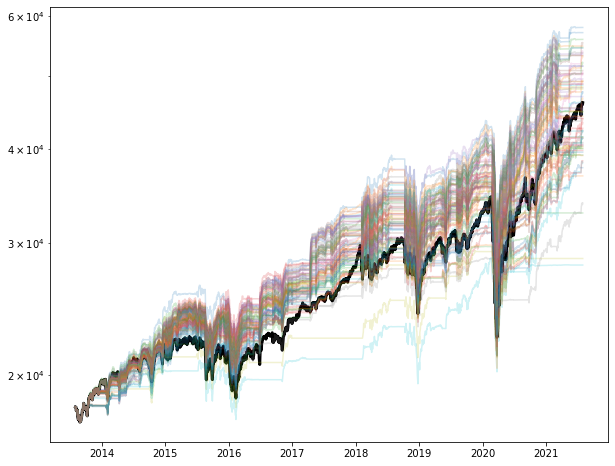

In [74]:
best2data = run_sim(df, 
                    sd, 
                    best2window, 
                    best2params, 
                    best2data, 
                    best2yet, 
                    specified=specified)

% in now: 0.0050704238403435475
Actions taken: 122


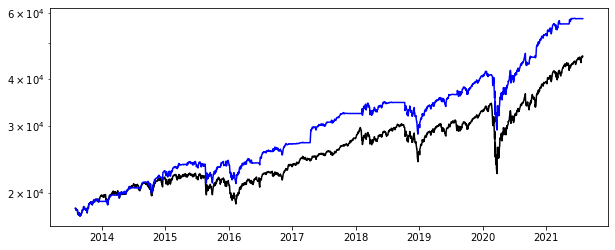

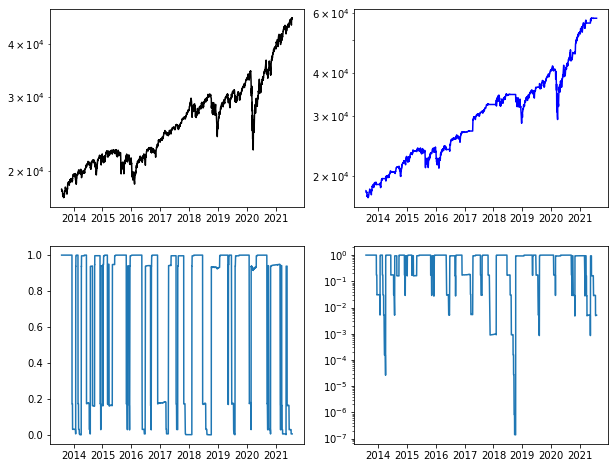

In [75]:
plot_results(best2data)

% in now: 0.0050704238403435475
Actions taken: 122


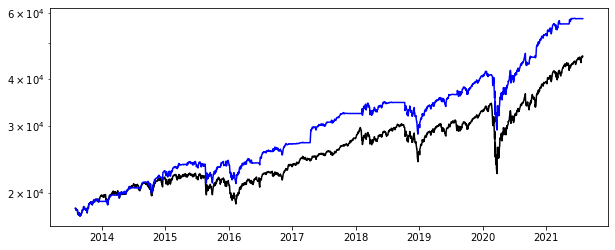

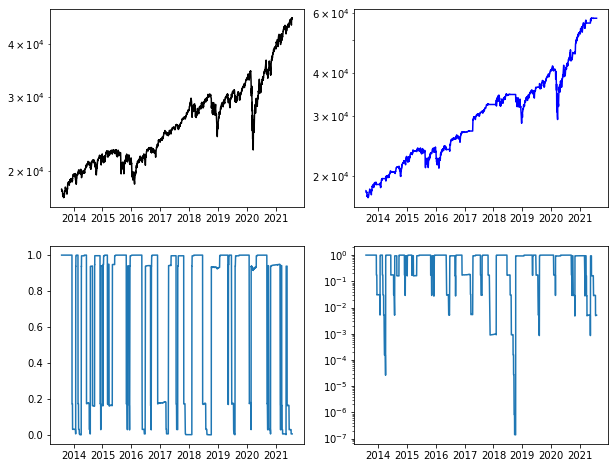

In [76]:
plot_results(best2data, '2007-01-01')

% in now: 0.0050704238403435475
Actions taken: 23


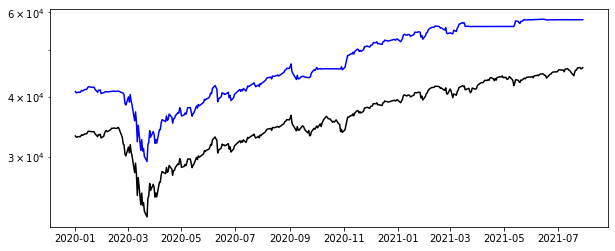

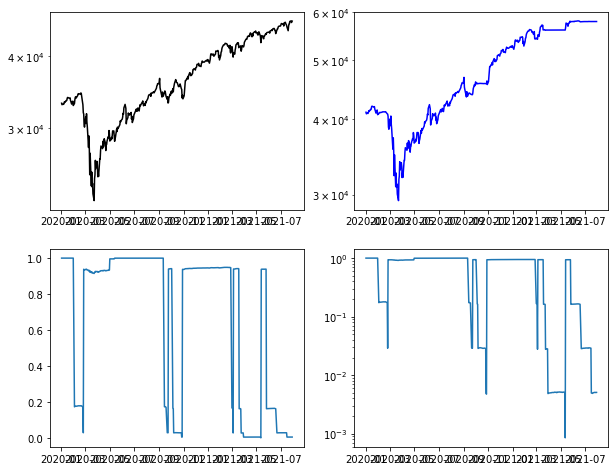

In [77]:
plot_results(best2data, '2020-01-01')

In [78]:
RUN += 1

In [54]:
!say wilshire 20 done

In [55]:
# THUR